In [1]:
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText

import regress_with_conf_interval as re

In [2]:
filename = r'./data/goodness-of-fit/sample_data/elapseTime.csv' 
df = pd.read_csv(filename)
type(df)

pandas.core.frame.DataFrame

In [3]:
for idx, elapsed_time in enumerate(df.elapsed_time):
    #print("Elasped time : ", elapsed_time)
    if elapsed_time.find('h') != -1:
        hour, elapsed_time = elapsed_time.split('h')
    else:
        hour = 0.0

    if elapsed_time.find('m') != -1 and elapsed_time.find('ms') == -1:
        minute, elapsed_time = elapsed_time.split('m')
    else:
        minute = 0.0

    if elapsed_time.find('s') != -1 and elapsed_time.find('ms') == -1:
        second, elapsed_time = elapsed_time.split('s')
    else:   
        second = 0.0

    if elapsed_time.find('ms') != -1:
        ms, elapsed_time = elapsed_time.split('ms')
    else:
        ms = 0.0
    
    # print("hour : ", float(hour))
    # print("minute : ", float(minute))
    # print("second : ", float(second))
    # print("ms : ", float(ms))

    df.elapsed_time[idx] = str(float(hour) * 3600 + float(minute) * 60 + float(second) + float(ms) / 100)

In [4]:
# Check conversion
x = df['block_height']
y = df['elapsed_time']

frame = pd.Series(y, index=list(x - 1))
frame

0       34.061369629
1       10.741204175
2       13.317419221
3        2.518999042
4       26.084543855
            ...     
1495    22.218589247
1496     17.28293738
1497    37.012054969
1498     5.429204982
1499    27.123879825
Name: elapsed_time, Length: 1500, dtype: object

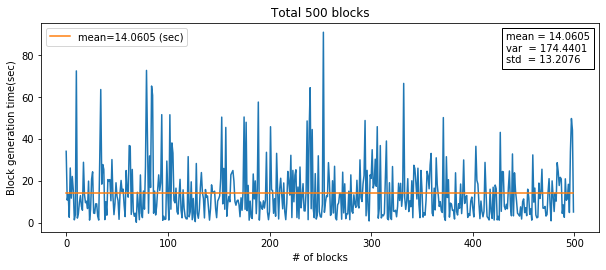

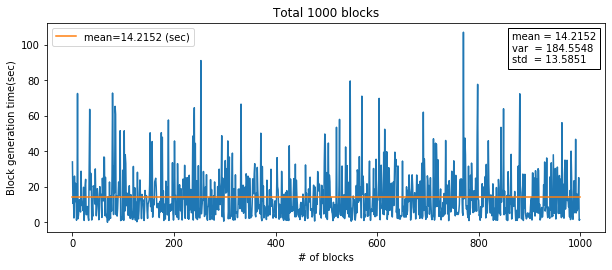

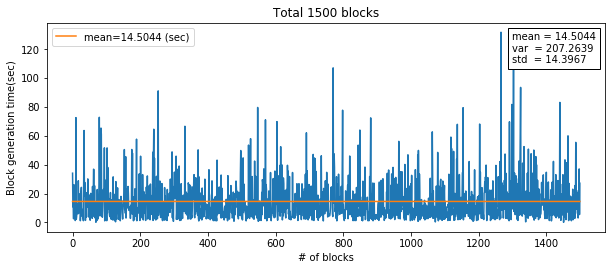

In [5]:
# Plot data
plt.rcParams["figure.figsize"] = (10,50)
difficulty = [0,0,0,0,3,3,3,3]
threads = [45,60,75,90,45,60,75,90]
mean_list = []
for i in range(len(df)//500):
    x = df['block_height'][:(i+1)*500]
    frame = df['elapsed_time'][:(i+1)*500].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    
    mean = pd.Series(frame.mean(), index=list(x))
    

    ax.set_title(f"Total {(i+1)*500} blocks")
    ax.set_xlabel("# of blocks")
    ax.set_ylabel("Block generation time(sec)")
    ax.plot(frame)
    ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    
    textstr = '\n'.join((
        r'mean = %.4f' % (frame.mean()),
        r'var  = %.4f' % (frame.var()),
        r'std  = %.4f' % (frame.std()))
    )
    mean_list.append(frame.mean().astype(float))
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="upper left")

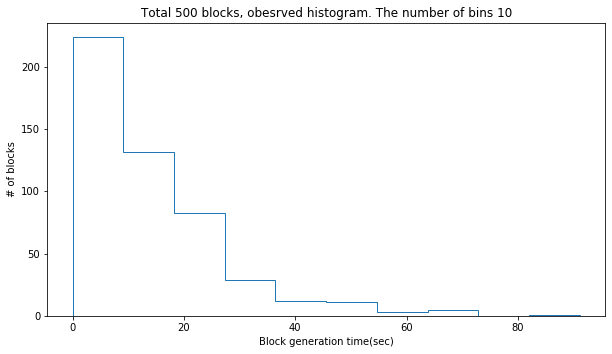

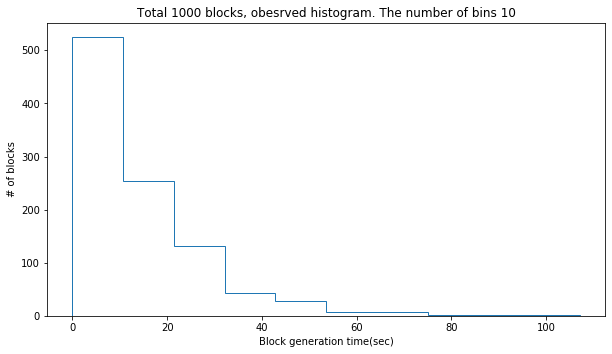

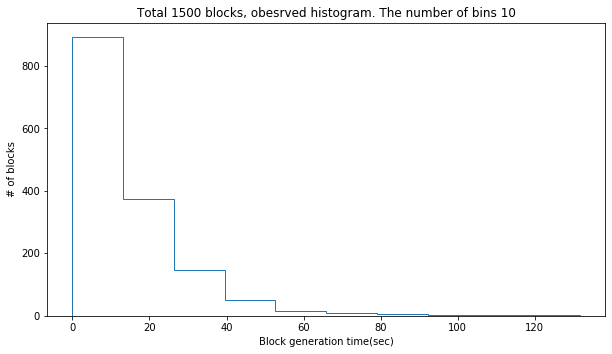

In [6]:
plt.rcParams["figure.figsize"] = (10,70)
num_of_bin = 10
histogram_val_list = []
histogram_bin_list = []
for i in range(len(df)//500):
    x = df['block_height'][:(i+1)*500]
    frame = df['elapsed_time'][:(i+1)*500].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    

    ax.set_title(f"Total {(i+1)*500} blocks, obesrved histogram. The number of bins {num_of_bin}")
    ax.set_xlabel("Block generation time(sec)")
    ax.set_ylabel("# of blocks")
    #plt.hist(frame, bins=num_of_bin, histtype='step')    
    
    val, bins, patches = plt.hist(frame, bins=num_of_bin * (0 + 1), histtype='step', range=(0, max(frame) + min(frame)))    
    
    histogram_val_list.append(val)
    histogram_bin_list.append(bins)
    #plt.legend(loc="upper left")

In [7]:
patches[0]

&lt;matplotlib.patches.Polygon at 0x7f81182e0be0&gt;

In [8]:
histogram_bin_list[0]

array([ 0.        ,  9.11305195, 18.2261039 , 27.33915585, 36.4522078 ,
       45.56525975, 54.6783117 , 63.79136365, 72.9044156 , 82.01746754,
       91.13051949])

In [9]:
histogram_val_list[0]

array([224., 132.,  83.,  29.,  12.,  11.,   3.,   5.,   0.,   1.])

In [10]:
a = histogram_bin_list[0][1:]
b = histogram_bin_list[0][:-1]
c = a - b
print(c)
print(sum(c))
print(max(histogram_bin_list[0]))

[9.11305195 9.11305195 9.11305195 9.11305195 9.11305195 9.11305195
 9.11305195 9.11305195 9.11305195 9.11305195]
91.13051949400001
91.13051949400001


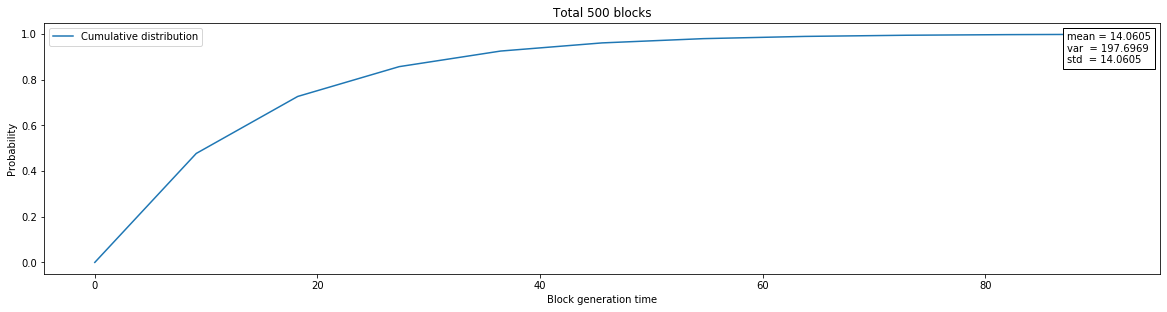

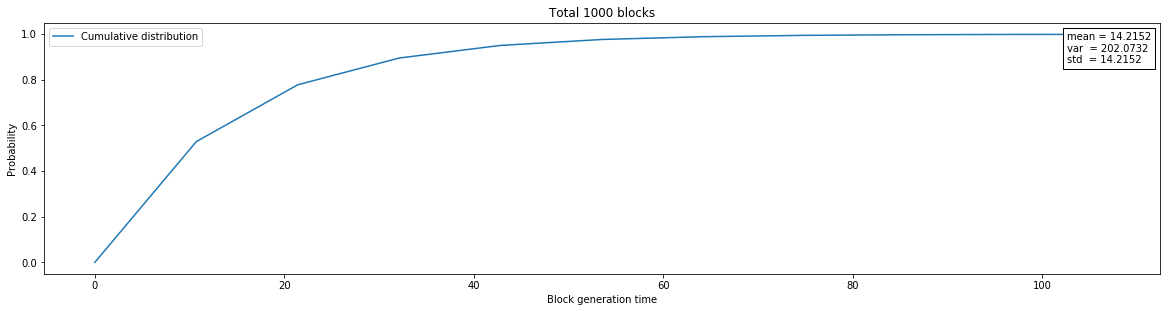

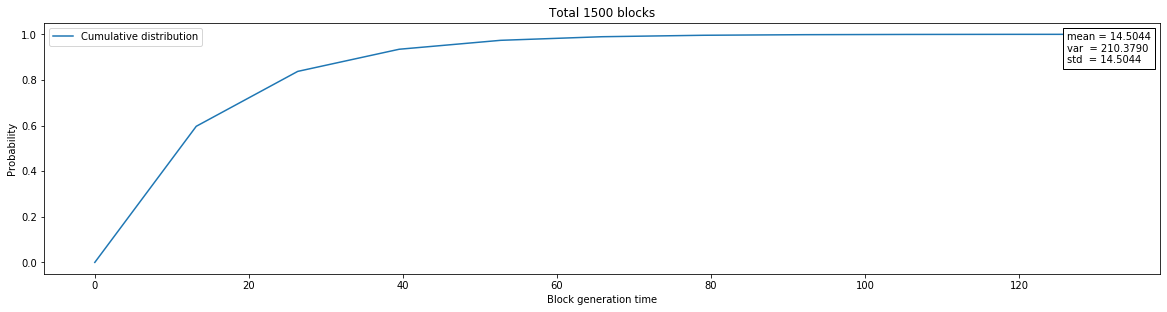

In [11]:
# Plot data
plt.rcParams["figure.figsize"] = (20,60)
cumulative_exp_distr_list = []
for i in range(len(df)//500):  
    exp_part = np.exp(-(1/mean_list[i]) * np.array(histogram_bin_list[i]))  
    exp_distr = 1/mean_list[i] * exp_part

    cumulative_exp_distr = 1 - exp_part
    cumulative_exp_distr_list.append(cumulative_exp_distr)
    #exp_distr_frequency = (500 * (i + 1)) * exp_distr

    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)            

    ax.set_title(f"Total {(i+1)*500} blocks")
    ax.set_xlabel("Block generation time")
    #ax.set_ylabel("# of blocks")
    ax.set_ylabel("Probability")

    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #print(len(histogram_bin_list[i][:-1]))
    #print(len(exp_distr_histogram))
    
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Exp distribution")
    ax.plot(histogram_bin_list[i], cumulative_exp_distr, label=f"Cumulative distribution")

    #plt.hist(exp_distr_histogram, bins=num_of_bin, histtype='step')    

    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="top left")

In [12]:
cumulative_exp_distr_list[0]
a = np.array(cumulative_exp_distr_list[0][1:])
b = np.array(cumulative_exp_distr_list[0][:-1])
a[-1] = 1
c = a - b
c = np.append(cumulative_exp_distr_list[0][0], c)
print(c)
print(sum(c) == 1)

[0.         0.47697848 0.24947001 0.13047818 0.0682429  0.03569251
 0.01866795 0.00976374 0.00510665 0.00267089 0.00292871]
True


In [13]:
#cumulative_exp_distr_list[2]
histogram_bin_list[0]

array([ 0.        ,  9.11305195, 18.2261039 , 27.33915585, 36.4522078 ,
       45.56525975, 54.6783117 , 63.79136365, 72.9044156 , 82.01746754,
       91.13051949])

In [14]:
cumulative_exp_distr_list[2]

array([0.        , 0.59666856, 0.83732375, 0.93438756, 0.97353644,
       0.98932641, 0.99569501, 0.99826366, 0.99929968, 0.99971754,
       0.99988607])

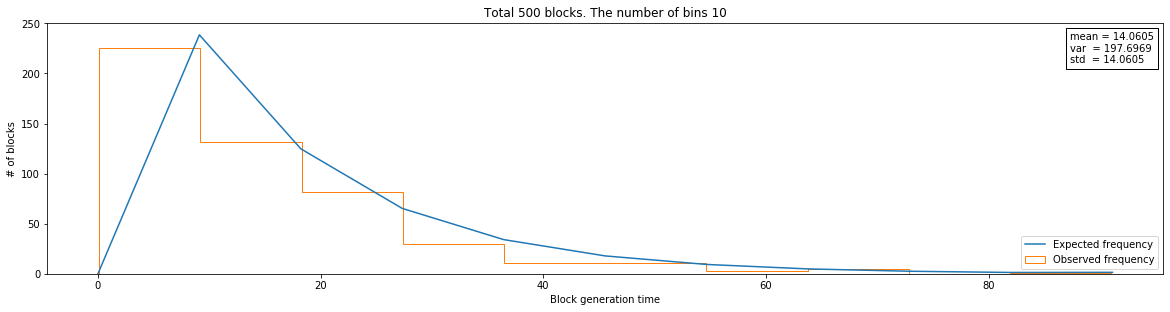

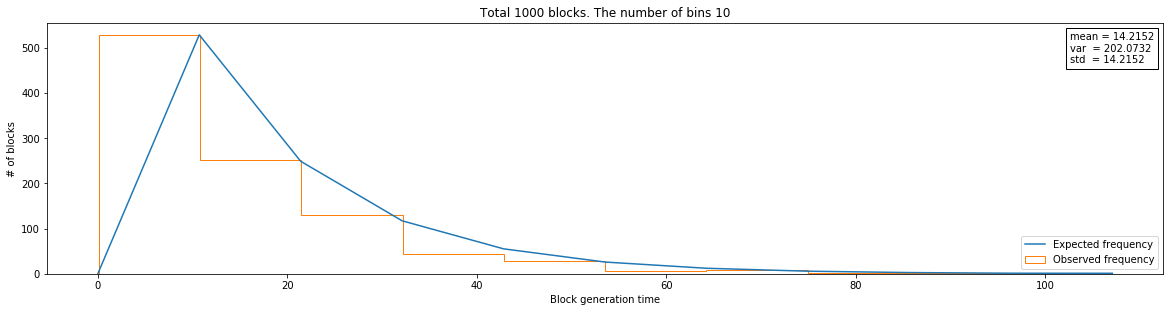

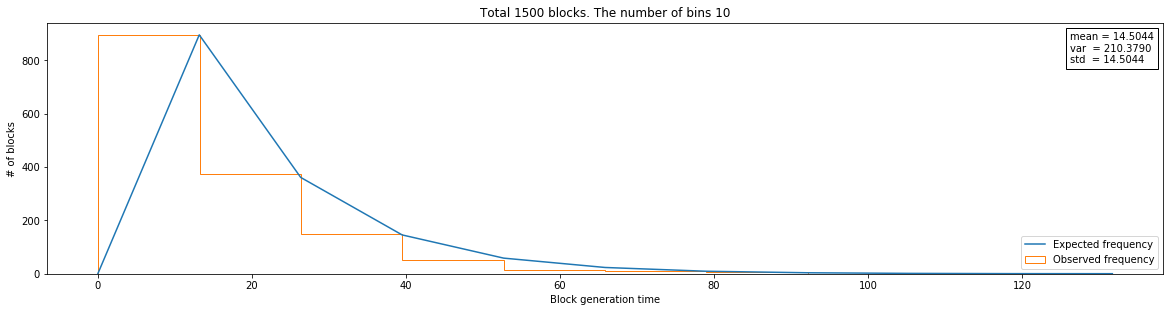

In [15]:
plt.rcParams["figure.figsize"] = (20,60)
expected_histogram_val_list = []
expected_histogram_bin_list = []
interval_val_list = []
for i in range(len(df)//500):    
    frame = df['elapsed_time'][:(i+1)*500].astype(float)
    cumulative_exp_distr = cumulative_exp_distr_list[i]
        
    #left_shifted = np.array(cumulative_exp_distr_list[i][1:])
    #right_shifted = np.array(cumulative_exp_distr_list[i][:-1])

    left_shifted = np.array(cumulative_exp_distr[1:])
    right_shifted = np.array(cumulative_exp_distr[:-1])
    # last interval includes [90%, inf]
    left_shifted[-1] = 1

    interval = left_shifted - right_shifted
    interval = np.append(right_shifted[0], interval)

    assert sum(interval) == 1 and len(interval) == len(cumulative_exp_distr)
    expected_freq = (i + 1) * 500 * interval
    interval_val_list.append(expected_freq)

    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)            

    ax.set_title(f"Total {(i+1)*500} blocks. The number of bins {num_of_bin}")
    ax.set_xlabel("Block generation time")
    ax.set_ylabel("# of blocks")
    #ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr, label=f"Expected histogram")
    #ax.plot(histogram_bin_list[i][:-1], exp_distr_frequency, label=f"Expected frequency")
    
    ax.plot(histogram_bin_list[i], expected_freq, label=f"Expected frequency")
    ax.hist(frame, bins=num_of_bin * (0 + 1), histtype='step', label=f"Observed frequency")    

    textstr = '\n'.join((
        r'mean = %.4f' % (mean_list[i]),
        r'var  = %.4f' % (mean_list[i] * mean_list[i]),
        r'std  = %.4f' % (mean_list[i]))
    )    
    textbox = AnchoredText(textstr, loc=1)
    ax.add_artist(textbox)

    plt.legend(loc="lower right")

In [16]:
print(histogram_val_list[2])
print(interval_val_list[2])

[893. 373. 148.  51.  16.  10.   5.   1.   2.   1.]
[0.00000000e+00 8.95002846e+02 3.60982783e+02 1.45595704e+02
 5.87233245e+01 2.36849628e+01 9.55289007e+00 3.85298087e+00
 1.55402831e+00 6.26788470e-01 4.23691659e-01]


In [17]:
a = (np.array(histogram_val_list[2]) - np.array(interval_val_list[2][1:])) ** 2
b = a / np.array(interval_val_list[2][1:])
print(sum(b))

8.305858830931701


In [18]:
chi_square_list = []
difference_list = []
for i in range(len(df)//500):
    square_of_difference = (np.array(histogram_val_list[i]) - np.array(interval_val_list[i][1:])) ** 2
    chi_square = square_of_difference / np.array(interval_val_list[i][1:])
    #chi_square_list.append(chi_square)
    difference_list.append(np.sum(chi_square))

In [19]:
difference_list

[13.672558791166583, 7.966545128032521, 8.305858830931701]

In [20]:
from scipy.stats import chisquare
for i in range(len(df)//500):
    result = chisquare(histogram_val_list[i], interval_val_list[i][1:])
    print(result)

Power_divergenceResult(statistic=13.672558791166583, pvalue=0.13445896994116197)
Power_divergenceResult(statistic=7.966545128032521, pvalue=0.5375211630192651)
Power_divergenceResult(statistic=8.305858830931701, pvalue=0.5036410878284676)
